# OAE: MNIST

## Evaluations - Figure

In [1]:
import os
import sys
import logging
import json
import copy
import random
import numpy as np
import pandas as pd

os.environ['CUDA_VISIBLE_DEVICES']='0'
import tensorflow as tf

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pylab
import PIL
%matplotlib inline

seed_value = 12345
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.set_random_seed(seed_value)

from keras.utils import to_categorical
import keras.backend as k

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = True
k.set_session(tf.Session(config=config))

sys.path.append('/'.join(os.getcwd().split('/')))
from ornstein_auto_encoder import configuration
from ornstein_auto_encoder import readers
from ornstein_auto_encoder import samplers
from ornstein_auto_encoder import build_network

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Set basic variables

In [2]:
logging.basicConfig(format = '[%(name)-8s|%(levelname)s|%(filename)s:%(lineno)s] %(message)s',
                    level=logging.INFO)
log = logging.getLogger()
logging.getLogger("PIL").setLevel(logging.CRITICAL)

In [3]:
fig_dir = "./figures/mnist"

model_path = 'mnist_pretrained/mnist_imbalance_psoae'
model_aka = 'PSOAE'
path_info_config = "configurations/mnist/psoae_path_info.cfg"
network_info_config = "configurations/mnist/psoae_network_info.cfg"
feature_b = False

config_data = configuration.Configurator(path_info_config, log, verbose=False)
config_data.set_config_map(config_data.get_section_map())
config_network = configuration.Configurator(network_info_config, log, verbose=False)
config_network.set_config_map(config_network.get_section_map())
path_info = config_data.get_config_map()
network_info = config_network.get_config_map()

architecture = path_info['model_info']['model_architecture']

log.info('%22s : %s' % ('model_aka', model_aka))
log.info('%22s : %s' % ('model_path', model_path))
log.info('%22s : %s' % ('reader', network_info['model_info']['reader_class']))
log.info('%22s : %s' % ('architecture', architecture))

[root    |INFO|<ipython-input-3-32406c4b8257>:18]              model_aka : PSOAE
[root    |INFO|<ipython-input-3-32406c4b8257>:19]             model_path : mnist_pretrained/mnist_imbalance_psoae
[root    |INFO|<ipython-input-3-32406c4b8257>:20]                 reader : MNISTReader
[root    |INFO|<ipython-input-3-32406c4b8257>:21]           architecture : ../../architecture/mnist_z8_psoae/


In [4]:
# Reader
reader_class = getattr(readers, network_info['model_info']['reader_class'].strip())  
reader = reader_class(log, path_info, network_info, verbose=True)

[root    |INFO|readers.py:74] -------------------------------------------------
[root    |INFO|readers.py:75] Images per Class
[root    |INFO|readers.py:76] 
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64
[root    |INFO|readers.py:77] -------------------------------------------------
[root    |INFO|readers.py:78] Summary
[root    |INFO|readers.py:79] 
count      10.000000
mean     7000.000000
std       399.315804
min      6313.000000
25%      6837.750000
50%      6930.500000
75%      7103.250000
max      7877.000000
dtype: float64
[root    |INFO|readers.py:80] -------------------------------------------------


In [5]:
### Bulid network ####################################################################################
log.info('-----------------------------------------------------------------')
network_class = getattr(build_network, network_info['model_info']['network_class'].strip())  
network = network_class(log, path_info, network_info, n_label=reader.get_n_label())
network.build_model('./%s/%s' % (model_path,  path_info['model_info']['model_architecture']), verbose=2)
network.load(model_path)
log.info('-----------------------------------------------------------------')

[root    |INFO|<ipython-input-5-2d3ef5cc26b5>:2] -----------------------------------------------------------------


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


[tensorflow|WARNING|deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
[root    |INFO|_build_base_network.py:75] encoder_base.yaml
[root    |INFO|layer_utils.py:112] Model: "encoder_base"
[root    |INFO|layer_utils.py:113] ________________________________________________________________________________________________________________________________________________________________________________________________________
[root    |INFO|layer_utils.py:110] Layer (type)                                                                              Output Shape                                                                    Param #                       
[root    |INFO|layer_utils.p

[root    |INFO|layer_utils.py:110] pre_h_bn (BatchNormalization)                                                             (None, 64)                                                                      256                           
[root    |INFO|layer_utils.py:177] ________________________________________________________________________________________________________________________________________________________________________________________________________
[root    |INFO|layer_utils.py:110] pre_h_activation (Activation)                                                             (None, 64)                                                                      0                             
[root    |INFO|layer_utils.py:175] ========================================================================================================================================================================================================
[root    |INFO|layer_utils.py:188] Total params: 863,424

[root    |INFO|layer_utils.py:110] h_input (InputLayer)                                              (None, 64)                                  0                                                                                         
[root    |INFO|layer_utils.py:177] ________________________________________________________________________________________________________________________________________________________________________________________________________
[root    |INFO|layer_utils.py:110] pre_e_h_dense (Dense)                                             (None, 32)                                  2080                    h_input[0][0]                                                     
[root    |INFO|layer_utils.py:177] ________________________________________________________________________________________________________________________________________________________________________________________________________
[root    |INFO|layer_utils.py:110] pre_e_h_bn (BatchNorm

[root    |INFO|layer_utils.py:110] d1_bn (BatchNormalization)                                                                (None, 14, 14, 64)                                                              256                           
[root    |INFO|layer_utils.py:177] ________________________________________________________________________________________________________________________________________________________________________________________________________
[root    |INFO|layer_utils.py:110] d1_activation (Activation)                                                                (None, 14, 14, 64)                                                              0                             
[root    |INFO|layer_utils.py:177] ________________________________________________________________________________________________________________________________________________________________________________________________________
[root    |INFO|layer_utils.py:110] d2_conv (Conv2DTransp

[root    |INFO|layer_utils.py:110] mlp3_dense_dense (Dense)                                                                  (None, 64)                                                                      4160                          
[root    |INFO|layer_utils.py:177] ________________________________________________________________________________________________________________________________________________________________________________________________________
[root    |INFO|layer_utils.py:110] mlp3_dense_activation (Activation)                                                        (None, 64)                                                                      0                             
[root    |INFO|layer_utils.py:177] ________________________________________________________________________________________________________________________________________________________________________________________________________
[root    |INFO|layer_utils.py:110] mlp4_dense_dense (Den

[root    |INFO|layer_utils.py:190] Non-trainable params: 1,280
[root    |INFO|layer_utils.py:191] ________________________________________________________________________________________________________________________________________________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


[tensorflow|WARNING|deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
keep_dims is deprecated, use keepdims instead


[tensorflow|WARNING|deprecation.py:506] From /DATA/home/muha/wrapped_code/ornstein_auto_encoder/ornstein_auto_encoder/ops.py:300: calling reduce_sum_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


[tensorflow|WARNING|module_wrapper.py:139] From /DATA/home/muha/wrapped_code/ornstein_auto_encoder/ornstein_auto_encoder/ops.py:352: The name tf.is_nan is deprecated. Please use tf.math.is_nan instead.

[root    |INFO|build_network.py:155] Generative sample blurr model
[root    |INFO|layer_utils.py:112] Model: "gen_blurr_model"
[root    |INFO|layer_utils.py:113] ________________________________________________________________________________________________________________________________________________________________________________________________________
[root    |INFO|layer_utils.py:110] Layer (type)                                                                              Output Shape                                                                    Param #                       
[root    |INFO|layer_utils.py:115] ===================================================================================================================================================================

[root    |INFO|layer_utils.py:110] encoder_b_model (Model)                                           [(None, 8), (None, 8), (None, 8)]           866496                  real_image_input[0][0]                                            
[root    |INFO|layer_utils.py:110]                                                                                                                                       class_info_input[0][0]                                            
[root    |INFO|layer_utils.py:177] ________________________________________________________________________________________________________________________________________________________________________________________________________
[root    |INFO|layer_utils.py:110] encoder_e_model (Model)                                           (None, 8)                                   869360                  real_image_input[0][0]                                            
[root    |INFO|layer_utils.py:110]                      

[root    |INFO|layer_utils.py:110] prior_e_input (InputLayer)                                        (None, 8)                                   0                                                                                         
[root    |INFO|layer_utils.py:177] ________________________________________________________________________________________________________________________________________________________________________________________________________
[root    |INFO|layer_utils.py:110] encoder_e_model (Model)                                           (None, 8)                                   869360                  real_image_input[0][0]                                            
[root    |INFO|layer_utils.py:110]                                                                                                                                       class_info_input[0][0]                                            
[root    |INFO|layer_utils.py:177] _____________________

[root    |INFO|layer_utils.py:177] ________________________________________________________________________________________________________________________________________________________________________________________________________
[root    |INFO|layer_utils.py:110] mean_recon_error (Lambda)                                         (None,)                                     0                       real_image_input[0][0]                                            
[root    |INFO|layer_utils.py:110]                                                                                                                                       decoder[3][0]                                                     
[root    |INFO|layer_utils.py:177] ________________________________________________________________________________________________________________________________________________________________________________________________________
[root    |INFO|layer_utils.py:110] penalty_e (Lambda)   

# Results

In [6]:
# Training
train_tot_idxs_path = os.path.join(model_path, path_info['model_info']['train_tot_idxs'])
test_tot_idxs_path = os.path.join(model_path, path_info['model_info']['test_tot_idxs'])
train_idx = np.load(train_tot_idxs_path)
test_idx = np.load(test_tot_idxs_path)

### Sampler ##########################################################################################
log.info('-----------------------------------------------------------------')
# Training data sampler
log.info('Construct training data sampler')
train_sampler_class = getattr(samplers, network_info['training_info']['sampler_class'].strip())
train_sampler = train_sampler_class(log, train_idx, reader, network_info['training_info'], verbose=True)
train_generator = samplers.train_generator(train_sampler)

# Test data sampler
log.info('Construct test data sampler')
validation_sampler_class = getattr(samplers, network_info['validation_info']['sampler_class'].strip())
test_sampler = validation_sampler_class(log, test_idx, reader, network_info['validation_info'], verbose=True)
test_generator = samplers.train_generator(test_sampler)

[root    |INFO|<ipython-input-6-fb42d2dc1a50>:8] -----------------------------------------------------------------
[root    |INFO|<ipython-input-6-fb42d2dc1a50>:10] Construct training data sampler
[root    |INFO|samplers.py:109] -------------------------------------------------
[root    |INFO|samplers.py:110] Images per Class
[root    |INFO|samplers.py:111] 
7    5834
3    5691
9    5580
0    5545
4    5497
8    5412
5    5064
1     628
2     563
6     543
dtype: int64
[root    |INFO|samplers.py:112] -------------------------------------------------
[root    |INFO|samplers.py:113] Summary
[root    |INFO|samplers.py:114] 
count      10.000000
mean     4035.700000
std      2394.316606
min       543.000000
25%      1737.000000
50%      5454.500000
75%      5571.250000
max      5834.000000
dtype: float64
[root    |INFO|samplers.py:115] -------------------------------------------------
[root    |INFO|<ipython-input-6-fb42d2dc1a50>:16] Construct test data sampler
[root    |INFO|samplers.py:1

In [7]:
picked_total_idxs = np.random.choice(test_sampler.train_idx, 1000)

x, y = test_sampler.reader.get_batch(picked_total_idxs)

y_table = pd.Series(y)
y_index = pd.Index(y)
y_class = np.sort(y_table.unique())
y_table = pd.Series(y)
y_counts = y_table.value_counts()
log.info('-------------------------------------------------')
log.info('Images per Class')
log.info('\n%s', y_counts)
log.info('-------------------------------------------------')
log.info('Summary')
log.info('\n%s', y_counts.describe())
log.info('-------------------------------------------------')

wx, wy = network.main_sampler(x,y)

picked_one_shot_idxs_per_class = []
for yc in y_class:
    picked_one_shot_idxs_per_class.append(np.random.choice(np.where(y==yc)[0], 1)[0])
picked_one_shot_idxs_per_class = np.array(picked_one_shot_idxs_per_class)

[root    |INFO|<ipython-input-7-1d03a26ed782>:10] -------------------------------------------------
[root    |INFO|<ipython-input-7-1d03a26ed782>:11] Images per Class
[root    |INFO|<ipython-input-7-1d03a26ed782>:12] 
1    128
8    108
6    108
7    107
4    100
9     97
3     97
2     97
0     91
5     67
dtype: int64
[root    |INFO|<ipython-input-7-1d03a26ed782>:13] -------------------------------------------------
[root    |INFO|<ipython-input-7-1d03a26ed782>:14] Summary
[root    |INFO|<ipython-input-7-1d03a26ed782>:15] 
count     10.00000
mean     100.00000
std       15.48476
min       67.00000
25%       97.00000
50%       98.50000
75%      107.75000
max      128.00000
dtype: float64
[root    |INFO|<ipython-input-7-1d03a26ed782>:16] -------------------------------------------------


In [8]:
if ('randomintercept' in network_info['model_info']['network_class'].lower() or \
    'productspace' in network_info['model_info']['network_class'].lower()):
    recon_x = network.ae_model.predict(wx[:-1], batch_size=100)
elif ('conditional' in network_info['model_info']['network_class'].lower()):
    recon_x = network.ae_model.predict(wx, batch_size=100)
else:
    recon_x = network.ae_model.predict(wx[:1], batch_size=100)
try:
    if len(x.shape) == 4: real_img = x
except: real_img = x[0]
    
repeated = 100
esp = 1.
gen_y_class = np.repeat(y_class, repeated, axis=0)

if 'randomintercept' in network_info['model_info']['network_class'].lower():
    b_sd = float(network_info['model_info']['b_sd'])
    estimate_b, fake_noise = network.encoder_model.predict(x, batch_size=100)
    new_b = np.random.multivariate_normal(np.zeros(network.get_z_dim()), 
                                          b_sd**2.*np.identity(network.get_z_dim()), 
                                          y_class.shape[0]).astype(np.float32)
    b = np.array([np.mean(estimate_b[np.random.choice(np.where(y==cls)[0],5)], axis=0) for cls in y_class])
    one_shot_b = np.array([estimate_b[picked_one_shot_idxs_per_class[i]] for i, cls in enumerate(y_class)])
    fake_latent = estimate_b + fake_noise
elif 'productspace' in network_info['model_info']['network_class'].lower():
    if feature_b: img, feature, clss, b_noise = wx
    else: img, clss, b_noise = wx
    b_sd = float(network_info['model_info']['b_sd'])
      
    if feature_b:
        sample_b, b_given_x, estimate_b  = network.encoder_b_model.predict_on_batch([feature, clss])
    else:
            sample_b, b_given_x, estimate_b  = network.encoder_b_model.predict_on_batch([img, clss])
    b = np.array([np.mean(estimate_b[np.random.choice(np.where(y==cls)[0],5)], axis=0) for cls in y_class])
    fake_noise = network.encoder_e_model.predict(wx[:-1], batch_size=100)
    new_b = np.random.multivariate_normal(np.zeros(b.shape[-1]), 
                                          b_sd**2.*np.identity(b.shape[-1]), 
                                          y_class.shape[0]).astype(np.float32)
    one_shot_b = np.array([estimate_b[picked_one_shot_idxs_per_class[i]] for i, cls in enumerate(y_class)])
else:
    fake_latent = network.encoder_model.predict(x, batch_size=100)
    fake_noise = fake_latent
    
mean = np.zeros(fake_noise.shape[-1])
cov = float(network_info['model_info']['e_sd'])**2.*np.identity(fake_noise.shape[-1])
true_noise = np.random.multivariate_normal(mean,cov,y.shape[0]).astype(np.float32)
mean = np.zeros(fake_noise.shape[-1])
cov = esp*np.identity(fake_noise.shape[-1])
noise = np.random.multivariate_normal(mean,cov,y_class.shape[0]*repeated).astype(np.float32)

tiled_noise = np.random.multivariate_normal(mean,cov,repeated).astype(np.float32)
tiled_noise[0,:] = 0.
tiled_noise = np.tile(tiled_noise, (y_class.shape[0],1))

if 'randomintercept' in network_info['model_info']['network_class'].lower():
    generated_images = network.decoder_model.predict(noise + np.repeat(b, repeated, axis=0),  batch_size=100)
    tiled_generated_images = network.decoder_model.predict(tiled_noise + np.repeat(b, repeated, axis=0), batch_size=100)
    prototype_images = network.decoder_model.predict(np.repeat(b, repeated, axis=0), batch_size=100)
    one_shot_prototype_images = network.decoder_model.predict(np.repeat(one_shot_b, repeated, axis=0), batch_size=100)
    one_shot_generated_images = network.decoder_model.predict(noise + np.repeat(one_shot_b, repeated, axis=0), batch_size=100)
    tiled_one_shot_generated_images = network.decoder_model.predict(tiled_noise + np.repeat(one_shot_b, repeated, axis=0),
                                                                    batch_size=100)
    tiled_new_generated_images = network.decoder_model.predict(tiled_noise + np.repeat(new_b, repeated, axis=0), batch_size=100)
elif 'productspace' in network_info['model_info']['network_class'].lower():
    generated_images = network.decoder_model.predict(np.concatenate([np.repeat(b, repeated, axis=0), noise], axis=-1),
                                                     batch_size=100)
    tiled_generated_images = network.decoder_model.predict(np.concatenate([np.repeat(b, repeated, axis=0), tiled_noise], axis=-1),
                                                           batch_size=100)
    prototype_images = network.decoder_model.predict(np.concatenate([np.repeat(b, repeated, axis=0), np.zeros_like(noise)], axis=-1),
                                                     batch_size=100)
    one_shot_prototype_images = network.decoder_model.predict(np.concatenate([np.repeat(one_shot_b, repeated, axis=0), np.zeros_like(noise)],
                                                                    axis=-1),
                                                     batch_size=100)
    one_shot_generated_images = network.decoder_model.predict(np.concatenate([np.repeat(one_shot_b, repeated, axis=0), noise], axis=-1),
                                                              batch_size=100)
    tiled_one_shot_generated_images = network.decoder_model.predict(np.concatenate([np.repeat(one_shot_b, repeated, axis=0), tiled_noise], axis=-1),
                                                                    batch_size=100)
    tiled_new_generated_images = network.decoder_model.predict(np.concatenate([np.repeat(new_b, repeated, axis=0), tiled_noise], axis=-1),
                                                               batch_size=100)
elif 'conditional' in network_info['model_info']['network_class'].lower():
    generated_images = network.decoder_model.predict([noise, to_categorical(gen_y_class, reader.get_n_label())], batch_size=100)
    tiled_generated_images = network.decoder_model.predict([tiled_noise, to_categorical(gen_y_class, reader.get_n_label())],
                                                           batch_size=100)
    prototype_images = network.decoder_model.predict([np.zeros_like(tiled_noise), to_categorical(gen_y_class, reader.get_n_label())], batch_size=100)
else:
    generated_images = network.decoder_model.predict(noise, batch_size=100)
    tiled_generated_images = network.decoder_model.predict(tiled_noise, batch_size=100)

[tensorflow|WARNING|module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



### Reconstruction of the Test Data

[root    |INFO|<ipython-input-9-94c8d3d702cb>:22] origin_sharpness : 0.13065225
[root    |INFO|<ipython-input-9-94c8d3d702cb>:23] recon_sharpness : 0.048737284


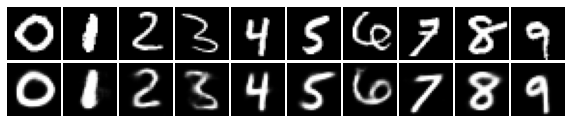

In [9]:
nidentities = 10
idxs = np.array([np.random.choice(np.where(y==cls)[0], size=1)[0] for cls in y_class[:nidentities]])

try: origin_sharpness = np.min(network.blurr_model.predict_on_batch(x[idxs]))
except: origin_sharpness = np.min(network.blurr_model.predict_on_batch(x[0][idxs]))
recon_sharpness = np.min(network.blurr_model.predict_on_batch(recon_x[idxs]))

fs = 1
nrows = 2
ncols = idxs.shape[0]
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(ncols*fs,nrows*fs)) 
for i in range(ncols):
    axes[0][i].imshow(real_img[idxs][i,:,:,0], cmap='gray')
    axes[0][i].axis('off')
    axes[1][i].imshow(recon_x[idxs][i,:,:,0], cmap='gray')
    axes[1][i].axis('off')

fig.subplots_adjust(wspace=0.025, hspace=0.05)
fig.savefig('%s/%s_%s.png' % (fig_dir, model_aka,'test_reconstruction'), bbox_inches='tight')
fig.show()

log.info('origin_sharpness : %s', origin_sharpness)
log.info('recon_sharpness : %s', recon_sharpness)

### Prototype images

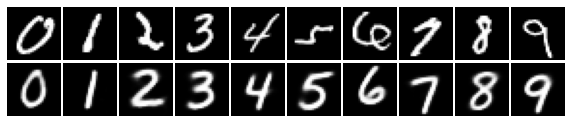

In [10]:
if not 'wae_gan' == network_info['model_info']['network_class'].lower():
    nidentities = 10
    picked_cls = y_class[:nidentities]
    idxs = np.array([np.where(gen_y_class==cls)[0][0] for cls in picked_cls])

    fs = 1
    nrows = 2
    ncols = idxs.shape[0]
    fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(ncols*fs,nrows*fs)) 
    for i in range(ncols):
        axes[0][i].imshow(real_img[picked_one_shot_idxs_per_class[i],:,:,0], cmap='gray')
        axes[0][i].axis('off')
        axes[1][i].imshow(prototype_images[idxs][i,:,:,0], cmap='gray')
        axes[1][i].axis('off')

    fig.subplots_adjust(wspace=0.025, hspace=0.05)
    fig.savefig('%s/%s_%s.png' % (fig_dir, model_aka,'test_prototype'), bbox_inches='tight')
    fig.show()

### One-shot prototype images

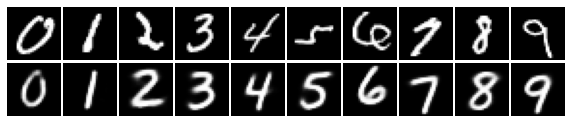

In [11]:
if 'oae' in network_info['model_info']['network_class'].lower():
    nidentities = 10
    picked_cls = y_class[:nidentities]
    idxs = np.array([np.where(gen_y_class==cls)[0][0] for cls in picked_cls])

    fs = 1
    nrows = 2
    ncols = idxs.shape[0]
    fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(ncols*fs,nrows*fs)) 
    for i in range(ncols):
        axes[0][i].imshow(real_img[picked_one_shot_idxs_per_class[i],:,:,0], cmap='gray')
        axes[0][i].axis('off')
        axes[1][i].imshow(one_shot_prototype_images[idxs][i,:,:,0], cmap='gray')
        axes[1][i].axis('off')

    fig.subplots_adjust(wspace=0.025, hspace=0.05)
    fig.savefig('%s/%s_%s.png' % (fig_dir, model_aka,'test_one_shot_prototype'), bbox_inches='tight')
    fig.show()

### Exemplar generation

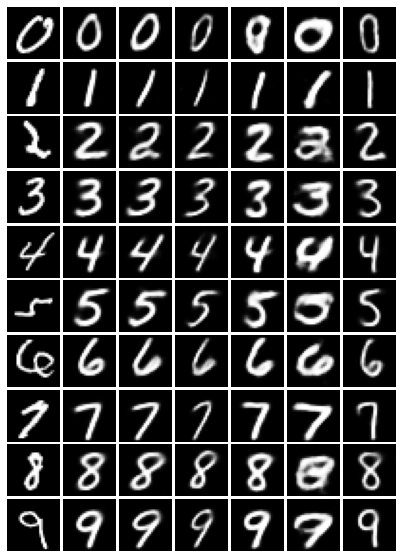

In [12]:
nidentities = 10
nrepeat = 6
fs = 1
nrows = nidentities
ncols = nrepeat + 1
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(ncols*fs,nrows*fs)) 

picked_cls = y_class[:nidentities]
x_idxs = np.array([np.random.choice(np.where(y==cls)[0], size=1)[0] for cls in picked_cls])

for i in range(nrows):
    axes[i][0].imshow(real_img[picked_one_shot_idxs_per_class[i],:,:,0], cmap='gray')
    axes[i][0].axis('off')
    for j in range(1, ncols):
        generated_img_idxs = np.where(gen_y_class==picked_cls[i])[0]
        axes[i][j].imshow(tiled_generated_images[generated_img_idxs[j-1],:,:,0], cmap='gray')
        axes[i][j].axis('off')
fig.subplots_adjust(wspace=0.025, hspace=0.05)
fig.savefig('%s/%s_%s.png' % (fig_dir, model_aka,'exemplar_generation'), bbox_inches='tight')
fig.show()

### One-shot exemplar generation

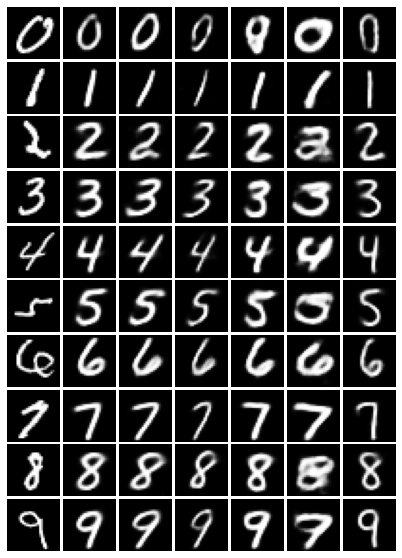

In [13]:
if 'oae' in network_info['model_info']['network_class'].lower():
    nidentities = 10
    nrepeat = 6
    fs = 1
    nrows = nidentities
    ncols = nrepeat + 1
    fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(ncols*fs,nrows*fs)) 

    picked_cls = y_class[:nidentities]

    for i in range(nrows):
        axes[i][0].imshow(real_img[picked_one_shot_idxs_per_class[i],:,:,0], cmap='gray')
        axes[i][0].axis('off')
        for j in range(1, ncols):
            generated_img_idxs = np.where(gen_y_class==picked_cls[i])[0]
            axes[i][j].imshow(tiled_one_shot_generated_images[generated_img_idxs[j-1],:,:,0], cmap='gray')
            axes[i][j].axis('off')
    fig.subplots_adjust(wspace=0.025, hspace=0.05)
    fig.savefig('%s/%s_%s.png' % (fig_dir, model_aka,'one_shot_exemplar_generation'), bbox_inches='tight')
    fig.show()

### Style transfer

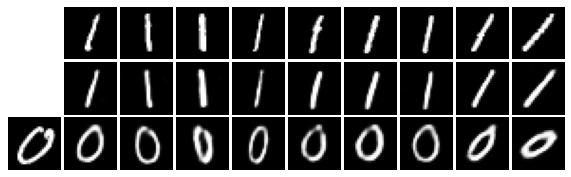

In [14]:
if ('oae' in network_info['model_info']['network_class'].lower() or \
    'conditional' in network_info['model_info']['network_class'].lower()):
    ntype = 9
    picked_identity, base_identity = y_class[:2]
    
    if 'randomintercept' in network_info['model_info']['network_class'].lower():
        recon_inputs = np.repeat(one_shot_b[y_class==base_identity], ntype, axis=0) + fake_noise[y==base_identity][:ntype]
        gen_inputs = np.repeat(one_shot_b[y_class==picked_identity], ntype, axis=0) + fake_noise[y==base_identity][:ntype]
    elif 'productspace' in network_info['model_info']['network_class'].lower():
        recon_inputs = np.concatenate([np.repeat(one_shot_b[y_class==base_identity], ntype, axis=0), fake_noise[y==base_identity][:ntype]],
                                      axis=-1)
        gen_inputs = np.concatenate([np.repeat(one_shot_b[y_class==picked_identity], ntype, axis=0), fake_noise[y==base_identity][:ntype]],
                                    axis=-1)
    else:
        recon_inputs = [fake_noise[y==base_identity][:ntype], np.repeat(wx[1][y==base_identity][:1], ntype, axis=0)]
        gen_inputs = [fake_noise[y==base_identity][:ntype], np.repeat(wx[1][y==picked_identity][:1], ntype, axis=0)]
    vector_arithmetic_recon = network.decoder_model.predict(recon_inputs, batch_size=100)
    vector_arithmetic_gen = network.decoder_model.predict(gen_inputs, batch_size=100)
        
    fs = 1
    nrows = 3
    ncols = ntype+1
    fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(ncols*fs,nrows*fs)) 

    axes[0][0].axis('off')
    axes[1][0].axis('off')
    axes[2][0].imshow(real_img[picked_one_shot_idxs_per_class[np.where(y_class == picked_identity)[0][0]],:,:,0], cmap='gray')
    axes[2][0].axis('off')
    for j in range(1,ncols):
        axes[0][j].imshow(real_img[y==base_identity][j-1,:,:,0], cmap='gray')
        axes[0][j].axis('off')
        axes[1][j].imshow(vector_arithmetic_recon[j-1,:,:,0], cmap='gray')
        axes[1][j].axis('off')
        axes[2][j].imshow(vector_arithmetic_gen[j-1,:,:,0], cmap='gray')
        axes[2][j].axis('off')
    fig.subplots_adjust(wspace=0.025, hspace=0.05)
    fig.savefig('%s/%s_%s.png' % (fig_dir, model_aka,'style_transfer'), bbox_inches='tight')
    fig.show()

### Unit generation

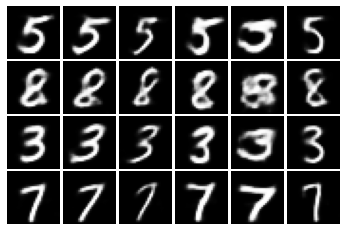

In [15]:
if 'oae' in network_info['model_info']['network_class'].lower():
    nidentities = 4
    nrepeat = 6
    fs = 1
    nrows = nidentities
    ncols = nrepeat
    fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(ncols*fs,nrows*fs)) 

    for i in range(nrows):
        for j in range(0, ncols):
            axes[i][j].imshow(tiled_new_generated_images[i*repeated + j,:,:,0], cmap='gray')
            axes[i][j].axis('off')
    fig.subplots_adjust(wspace=0.025, hspace=0.05)
    fig.savefig('%s/%s_%s.png' % (fig_dir, model_aka,'unit_generation'), bbox_inches='tight')
    fig.show()
elif 'wae' in network_info['model_info']['network_class'].lower():
    nidentities = 4
    nrepeat = 6
    fs = 1
    nrows = nidentities
    ncols = nrepeat
    fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(ncols*fs,nrows*fs)) 

    for i in range(nrows):
        for j in range(0, ncols):
            axes[i][j].imshow(generated_images[i*repeated + j,:,:,0], cmap='gray')
            axes[i][j].axis('off')
    fig.subplots_adjust(wspace=0.025, hspace=0.05)
    fig.savefig('%s/%s_%s.png' % (fig_dir, model_aka,'generation'), bbox_inches='tight')
    fig.show()

## Latent space analysis

#### Within-unit variation encoder

In [16]:
picked = np.random.choice(np.arange(true_noise.shape[0]), 300, replace=False)

latent = np.vstack([true_noise[picked], fake_noise[picked]])
latent_class = np.concatenate([np.ones(true_noise[picked].shape[0]), np.zeros(true_noise[picked].shape[0])])
latent_class_y = np.concatenate([10*np.ones(true_noise[picked].shape[0]), y[picked]])
tsne = TSNE(n_components=2, random_state=0)
latent_tsne = tsne.fit_transform(latent)

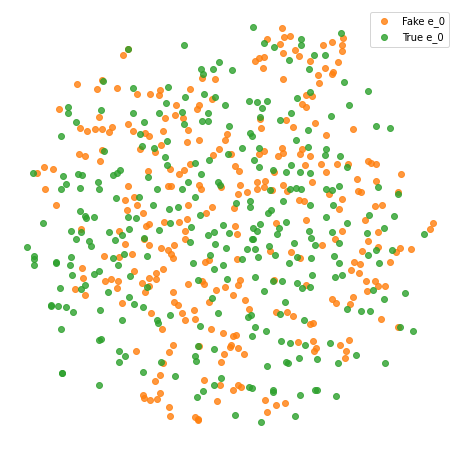

In [17]:
plt.figure(figsize=(8, 8))
plt.scatter(x = latent_tsne[latent_class==0,0], y=latent_tsne[latent_class==0,1], c='C1', label='Fake e_0', alpha=0.8)
plt.scatter(x = latent_tsne[latent_class==1,0], y=latent_tsne[latent_class==1,1], c='C2', label='True e_0', alpha=0.8)
plt.legend()
plt.axis('off')
plt.savefig("%s/%s_within_unit_variation_tsne" % (fig_dir, model_aka), bbox_inches='tight')
plt.show()

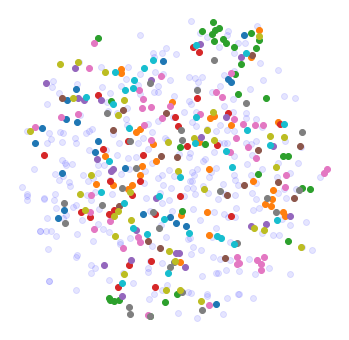

In [18]:
plt.figure(figsize=(6, 6))
plt.scatter(x = latent_tsne[latent_class_y==10,0], y=latent_tsne[latent_class_y==10,1], label='True e', alpha=0.1, c='blue')
for cls in np.unique(y):
    plt.scatter(x = latent_tsne[latent_class_y==cls,0], y=latent_tsne[latent_class_y==cls,1], label='Fake e^%s'%cls, alpha=1., cmap='Set3')
# plt.legend()
plt.axis('off')
plt.savefig("%s/%s_within_unit_variation_class" % (fig_dir, model_aka), bbox_inches='tight')
plt.show()

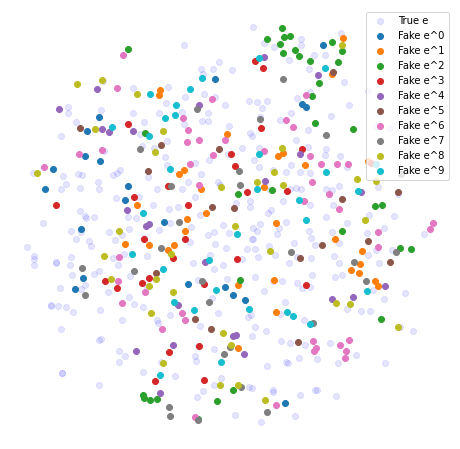

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(x = latent_tsne[latent_class_y==10,0], y=latent_tsne[latent_class_y==10,1], label='True e', alpha=0.1, c='blue')
for cls in np.unique(y):
    plt.scatter(x = latent_tsne[latent_class_y==cls,0], y=latent_tsne[latent_class_y==cls,1], label='Fake e^%s'%cls, alpha=1., cmap='Set3')
plt.legend()
plt.axis('off')
plt.savefig("%s/%s_within_unit_variation_class_with_legend" % (fig_dir, model_aka), bbox_inches='tight')
plt.show()

#### Identity encoder

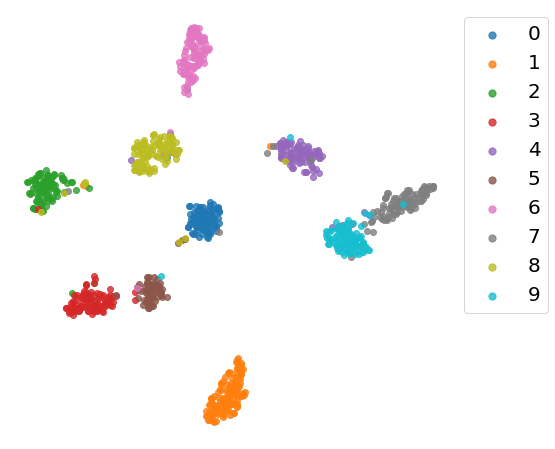

In [20]:
if 'oae' in network_info['model_info']['network_class'].lower():
    picked = np.concatenate([np.random.choice(np.where(y==cls)[0], 30) for cls in y_class], axis=0)
    picked = np.arange(y.shape[0])
    picked_y = y[picked]
    picked_estimate_b = estimate_b[picked]
    tsne = TSNE(n_components=2, random_state=0)
    fake_b_tsne = tsne.fit_transform(picked_estimate_b)
    
    plt.figure(figsize=(8, 8))
    for cls in np.unique(picked_y):
        plt.scatter(x=fake_b_tsne[picked_y==cls,0], y=fake_b_tsne[picked_y==cls,1], label=cls, alpha=0.8, cmap=pylab.cm.cool)
    plt.legend(bbox_to_anchor=(1., 1.), fontsize=20, markerscale=1.2) #, framealpha=0)
    plt.axis('off')
    plt.savefig("%s/%s_identity_tsne" % (fig_dir, model_aka), bbox_inches='tight')
    plt.show()

#### Fake latent

In [21]:
if 'productspace' in network_info['model_info']['network_class'].lower():
    fake_latent = np.concatenate([estimate_b, fake_noise], axis=-1)

picked = np.sum([y==cls for cls in y_class[:10]], axis=0).astype(np.bool)
picked_y = y[picked]
picked_fake_noise = fake_latent[picked]
tsne = TSNE(n_components=2, random_state=0)
fake_noise = tsne.fit_transform(picked_fake_noise)

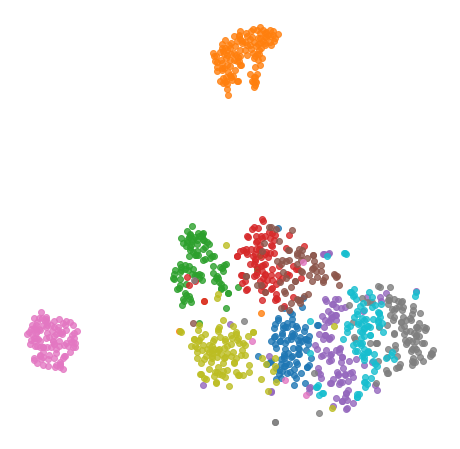

In [22]:
plt.figure(figsize=(8, 8))
for cls in np.unique(picked_y):
    plt.scatter(x=fake_noise[picked_y==cls,0], y=fake_noise[picked_y==cls,1], label=cls, alpha=0.8, cmap=pylab.cm.cool)
plt.axis('off')
plt.savefig("%s/%s_fake_latent_tsne" % (fig_dir, model_aka), bbox_inches='tight')
plt.show()